### Spotify Documentation
- https://spotipy.readthedocs.io/en/2.19.0/#examples
- IDs URIs and URLs

In [1]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [2]:
SPOTIPY_CLIENT_ID='e18fafeb60a949d2a9b7d1efccabe69a'
SPOTIPY_CLIENT_SECRET='739bbbed49864382a64a64ccd64ecdcc'
#SPOTIPY_REDIRECT_URI='your-app-redirect-url'

In [3]:
auth_manager = SpotifyClientCredentials(client_id=SPOTIPY_CLIENT_ID, client_secret=SPOTIPY_CLIENT_SECRET)
sp = spotipy.Spotify(auth_manager=auth_manager)

# Searching Tracks

In [4]:
results = sp.search(q='track:'+'baby',type='track')

In [5]:
results['tracks']

{'href': 'https://api.spotify.com/v1/search?query=track%3Ababy&type=track&offset=0&limit=10',
 'items': [{'album': {'album_group': 'album',
    'album_type': 'album',
    'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/5f7VJjfbwm532GiveGC0ZK'},
      'href': 'https://api.spotify.com/v1/artists/5f7VJjfbwm532GiveGC0ZK',
      'id': '5f7VJjfbwm532GiveGC0ZK',
      'name': 'Lil Baby',
      'type': 'artist',
      'uri': 'spotify:artist:5f7VJjfbwm532GiveGC0ZK'},
     {'external_urls': {'spotify': 'https://open.spotify.com/artist/2hlmm7s2ICUX0LVIhVFlZQ'},
      'href': 'https://api.spotify.com/v1/artists/2hlmm7s2ICUX0LVIhVFlZQ',
      'id': '2hlmm7s2ICUX0LVIhVFlZQ',
      'name': 'Gunna',
      'type': 'artist',
      'uri': 'spotify:artist:2hlmm7s2ICUX0LVIhVFlZQ'}],
    'available_markets': ['AD',
     'AE',
     'AG',
     'AL',
     'AM',
     'AO',
     'AR',
     'AT',
     'AU',
     'AZ',
     'BA',
     'BB',
     'BD',
     'BE',
     'BG',
     'BH',
   

In [6]:
print(len(results['tracks']))

7


In [7]:
results['tracks']['items']

[{'album': {'album_group': 'album',
   'album_type': 'album',
   'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/5f7VJjfbwm532GiveGC0ZK'},
     'href': 'https://api.spotify.com/v1/artists/5f7VJjfbwm532GiveGC0ZK',
     'id': '5f7VJjfbwm532GiveGC0ZK',
     'name': 'Lil Baby',
     'type': 'artist',
     'uri': 'spotify:artist:5f7VJjfbwm532GiveGC0ZK'},
    {'external_urls': {'spotify': 'https://open.spotify.com/artist/2hlmm7s2ICUX0LVIhVFlZQ'},
     'href': 'https://api.spotify.com/v1/artists/2hlmm7s2ICUX0LVIhVFlZQ',
     'id': '2hlmm7s2ICUX0LVIhVFlZQ',
     'name': 'Gunna',
     'type': 'artist',
     'uri': 'spotify:artist:2hlmm7s2ICUX0LVIhVFlZQ'}],
   'available_markets': ['AD',
    'AE',
    'AG',
    'AL',
    'AM',
    'AO',
    'AR',
    'AT',
    'AU',
    'AZ',
    'BA',
    'BB',
    'BD',
    'BE',
    'BG',
    'BH',
    'BI',
    'BJ',
    'BO',
    'BR',
    'BS',
    'BT',
    'BW',
    'BY',
    'BZ',
    'CA',
    'CD',
    'CG',
    'CH',
    'C

In [8]:
items_in_tracks = results['tracks']['items']
if len(items_in_tracks) > 0:
    for item in items_in_tracks:
        print(item['name'] + " - By - " + item['artists'][0]['name'])
        print("Track ID: " + item['id'] + " / Artist ID - " + item['artists'][0]['id'])
        print("------")

Drip Too Hard (Lil Baby & Gunna) - By - Lil Baby
Track ID: 78QR3Wp35dqAhFEc2qAGjE / Artist ID - 5f7VJjfbwm532GiveGC0ZK
------
Wants and Needs (feat. Lil Baby) - By - Drake
Track ID: 65OVbaJR5O1RmwOQx0875b / Artist ID - 3TVXtAsR1Inumwj472S9r4
------
Clean Baby Sleep White Noise (Loopable) - By - Dream Supplier
Track ID: 0zirWZTcXBBwGsevrsIpvT / Artist ID - 6Cqtx9fpxzggIMuKn0RGCp
------
Baby (Lil Baby feat. DaBaby) - By - Quality Control
Track ID: 5MPPttjfGap2C6j6eKcO6J / Artist ID - 6i392l38cR3uBPF0DbNs7S
------
Surround Sound (feat. 21 Savage & Baby Tate) - By - JID
Track ID: 1udwFobQ1JoOdWPQrp2b6u / Artist ID - 6U3ybJ9UHNKEdsH7ktGBZ7
------
Hot Boy (feat. Lil Baby) - By - Nardo Wick
Track ID: 31yydnZnSeCwkRPY7tlgQJ / Artist ID - 0Njy6yR9LykNKYg9yE23QN
------
Brooklyn Baby - By - Lana Del Rey
Track ID: 1NZs6n6hl8UuMaX0UC0YTz / Artist ID - 00FQb4jTyendYWaN8pK0wa
------
Babydoll - By - Dominic Fike
Track ID: 7yNf9YjeO5JXUE3JEBgnYc / Artist ID - 6USv9qhCn6zfxlBQIYJ9qs
------
EVERY CHANCE 

In [9]:
song_id = '37Nqx7iavZpotJSDXZWbJ3'

## Generating token for recommendation

In [10]:
import requests
import base64

In [11]:
def get_token(clientId,clientSecret):
    url = "https://accounts.spotify.com/api/token"
    headers = {}
    data = {}
    message = f"{clientId}:{clientSecret}"
    messageBytes = message.encode('ascii')
    base64Bytes = base64.b64encode(messageBytes)
    base64Message = base64Bytes.decode('ascii')
    headers['Authorization'] = "Basic " + base64Message
    data['grant_type'] = "client_credentials"
    r = requests.post(url, headers=headers, data=data)
    token = r.json()['access_token']
    return token

In [12]:
token = get_token(SPOTIPY_CLIENT_ID, SPOTIPY_CLIENT_SECRET)

In [13]:
token

'BQBmeUbHroHvKTMnBAgrFbkSFH4JsEu4D4oQF5moS2QrZafas75SZoFpy7e2Dcn1FAbcNe3pei4Xv_6WXDyHtz1AgtlmmUQtIEJ2HLnvssVwnX_42EuO'

## Getting recommendation based on song

In [14]:
def get_track_recommendations(seed_tracks,token):
    limit = 10
    recUrl = f"https://api.spotify.com/v1/recommendations?limit={limit}&seed_tracks={seed_tracks}"

    headers = {
        "Authorization": "Bearer " + token
    }

    res = requests.get(url=recUrl, headers=headers)
    return res.json()

In [15]:
json_response = get_track_recommendations(song_id,token)

In [16]:
json_response

{'tracks': [{'album': {'album_group': 'ALBUM',
    'album_type': 'ALBUM',
    'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/5f7VJjfbwm532GiveGC0ZK'},
      'href': 'https://api.spotify.com/v1/artists/5f7VJjfbwm532GiveGC0ZK',
      'id': '5f7VJjfbwm532GiveGC0ZK',
      'name': 'Lil Baby',
      'type': 'artist',
      'uri': 'spotify:artist:5f7VJjfbwm532GiveGC0ZK'}],
    'available_markets': ['AD',
     'AE',
     'AG',
     'AL',
     'AM',
     'AO',
     'AR',
     'AT',
     'AU',
     'AZ',
     'BA',
     'BB',
     'BD',
     'BE',
     'BF',
     'BG',
     'BH',
     'BI',
     'BJ',
     'BN',
     'BO',
     'BR',
     'BS',
     'BT',
     'BW',
     'BZ',
     'CA',
     'CD',
     'CG',
     'CH',
     'CI',
     'CL',
     'CM',
     'CO',
     'CR',
     'CV',
     'CW',
     'CY',
     'CZ',
     'DE',
     'DJ',
     'DK',
     'DM',
     'DO',
     'DZ',
     'EC',
     'EE',
     'EG',
     'ES',
     'ET',
     'FI',
     'FJ',
     'FM'

In [17]:
uris =[]
for i in json_response['tracks']:
    uris.append(i)
    print(f"\"{i['name']}\" by({i['artists'][0]['name']})")

"Commercial (feat. Lil Uzi Vert)" by(Lil Baby)
"Teenage Fever" by(Drake)
"l e t . g o . m y . h a n d (with Bas & 6LACK)" by(J. Cole)
"No Heart" by(21 Savage)
"Praise God" by(Kanye West)
"Handstand (with Doja Cat feat. Saweetie)" by(French Montana)
"Took Her To The O" by(King Von)
"goosebumps" by(Travis Scott)
"Mr. Glock" by(Key Glock)
"War" by(Drake)


In [18]:
recolist = json_response['tracks']
print(len(recolist))

10


In [19]:
recolist[0]

{'album': {'album_group': 'ALBUM',
  'album_type': 'ALBUM',
  'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/5f7VJjfbwm532GiveGC0ZK'},
    'href': 'https://api.spotify.com/v1/artists/5f7VJjfbwm532GiveGC0ZK',
    'id': '5f7VJjfbwm532GiveGC0ZK',
    'name': 'Lil Baby',
    'type': 'artist',
    'uri': 'spotify:artist:5f7VJjfbwm532GiveGC0ZK'}],
  'available_markets': ['AD',
   'AE',
   'AG',
   'AL',
   'AM',
   'AO',
   'AR',
   'AT',
   'AU',
   'AZ',
   'BA',
   'BB',
   'BD',
   'BE',
   'BF',
   'BG',
   'BH',
   'BI',
   'BJ',
   'BN',
   'BO',
   'BR',
   'BS',
   'BT',
   'BW',
   'BZ',
   'CA',
   'CD',
   'CG',
   'CH',
   'CI',
   'CL',
   'CM',
   'CO',
   'CR',
   'CV',
   'CW',
   'CY',
   'CZ',
   'DE',
   'DJ',
   'DK',
   'DM',
   'DO',
   'DZ',
   'EC',
   'EE',
   'EG',
   'ES',
   'ET',
   'FI',
   'FJ',
   'FM',
   'FR',
   'GA',
   'GB',
   'GD',
   'GE',
   'GH',
   'GM',
   'GN',
   'GQ',
   'GR',
   'GT',
   'GW',
   'GY',
   'HK',
   '

In [20]:
import pandas as pd

In [21]:
recommendation_result = pd.DataFrame(recolist)
recommendation_result

,album,artists,available_markets,disc_number,duration_ms,explicit,external_ids,external_urls,href,id,is_local,name,popularity,preview_url,track_number,type,uri
0,"{'album_group': 'ALBUM', 'album_type': 'ALBUM'...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,214214,True,{'isrc': 'USUG12000062'},{'spotify': 'https://open.spotify.com/track/3t...,https://api.spotify.com/v1/tracks/3tDqEKKUs6gf...,3tDqEKKUs6gf8zMvSuLyLA,False,Commercial (feat. Lil Uzi Vert),67,None,9,track,spotify:track:3tDqEKKUs6gf8zMvSuLyLA
1,"{'album_group': 'ALBUM', 'album_type': 'ALBUM'...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,219692,True,{'isrc': 'USCM51700048'},{'spotify': 'https://open.spotify.com/track/6n...,https://api.spotify.com/v1/tracks/6n3HGiq4v35D...,6n3HGiq4v35D6eFOSwqYuo,False,Teenage Fever,82,None,14,track,spotify:track:6n3HGiq4v35D6eFOSwqYuo
2,"{'album_group': 'ALBUM', 'album_type': 'ALBUM'...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,266291,True,{'isrc': 'QMJMT2103644'},{'spotify': 'https://open.spotify.com/track/0G...,https://api.spotify.com/v1/tracks/0GAyuCo975IH...,0GAyuCo975IHGxxiLKDufB,False,l e t . g o . m y . h a n d (with Bas & 6LACK),68,None,8,track,spotify:track:0GAyuCo975IHGxxiLKDufB
3,"{'album_group': 'ALBUM', 'album_type': 'ALBUM'...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,235040,True,{'isrc': 'QZ45A1600040'},{'spotify': 'https://open.spotify.com/track/4g...,https://api.spotify.com/v1/tracks/4gmmRb6bZJff...,4gmmRb6bZJffOOiww1JGTO,False,No Heart,75,https://p.scdn.co/mp3-preview/117a84c65c137bf1...,2,track,spotify:track:4gmmRb6bZJffOOiww1JGTO
4,"{'album_group': 'ALBUM', 'album_type': 'ALBUM'...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,226652,False,{'isrc': 'USUM72116287'},{'spotify': 'https://open.spotify.com/track/0W...,https://api.spotify.com/v1/tracks/0WSEq9Ko4kFP...,0WSEq9Ko4kFPt8yo3ICd6T,False,Praise God,77,None,6,track,spotify:track:0WSEq9Ko4kFPt8yo3ICd6T
5,"{'album_group': 'ALBUM', 'album_type': 'ALBUM'...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,170057,True,{'isrc': 'USSM12107777'},{'spotify': 'https://open.spotify.com/track/0J...,https://api.spotify.com/v1/tracks/0JcgIOrlZ0CN...,0JcgIOrlZ0CNUOPxyudnrK,False,Handstand (with Doja Cat feat. Saweetie),58,https://p.scdn.co/mp3-preview/c865cdfdd700f4a1...,8,track,spotify:track:0JcgIOrlZ0CNUOPxyudnrK
6,"{'album_group': 'ALBUM', 'album_type': 'ALBUM'...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,196179,True,{'isrc': 'USUYG1296663'},{'spotify': 'https://open.spotify.com/track/7f...,https://api.spotify.com/v1/tracks/7fEoXCZTZFos...,7fEoXCZTZFosUFvFQg1BmW,False,Took Her To The O,80,https://p.scdn.co/mp3-preview/f46e866c30a61803...,2,track,spotify:track:7fEoXCZTZFosUFvFQg1BmW
7,"{'album_group': 'ALBUM', 'album_type': 'ALBUM'...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,243836,True,{'isrc': 'USSM11607555'},{'spotify': 'https://open.spotify.com/track/6g...,https://api.spotify.com/v1/tracks/6gBFPUFcJLzW...,6gBFPUFcJLzWGx4lenP6h2,False,goosebumps,85,https://p.scdn.co/mp3-preview/5c45fee2743d3998...,9,track,spotify:track:6gBFPUFcJLzWGx4lenP6h2
8,"{'album_group': 'ALBUM', 'album_type': 'ALBUM'...",[{'external_urls': {'spotify': 'https://open.s...,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,146880,True,{'isrc': 'USUYG1291812'},{'spotify': 'https://open.spotify.com/track/1i...,https://api.spotify.com/v1/tracks/1ipSpQfzBbhP...,1ipSpQfzBbhPFhYm6tfVIz,False,Mr. Glock,73,https://p.scdn.co/mp3-preview/6efa7953e7757397...,13,track,spotify:track:1ipSpQfzBbhPFhYm6tfVIz
9,"{'album_group': 'ALBUM'

In [22]:
reco_df = recommendation_result[['name', 'explicit', 'duration_ms', 'popularity']]
# 'release_date'

In [23]:
reco_df

,name,explicit,duration_ms,popularity
0,Commercial (feat. Lil Uzi Vert),True,214214,67
1,Teenage Fever,True,219692,82
2,l e t . g o . m y . h a n d (with Bas & 6LACK),True,266291,68
3,No Heart,True,235040,75
4,Praise God,False,226652,77
5,Handstand (with Doja Cat feat. Saweetie),True,170057,58
6,Took Her To The O,True,196179,80
7,goosebumps,True,243836,85
8,Mr. Glock,True,146880,73
9,War,True,180000,66


In [24]:
reco_df.describe()

,duration_ms,popularity
count,10.000000,10.000000
mean,209884.100000,73.100000
std,36514.834585,8.359293
min,146880.000000,58.000000
25%,184044.750000,67.250000
50%,216953.000000,74.000000
75%,232943.000000,79.250000
max,266291.000000,85.000000


In [25]:
reco_df.dtypes

name           object
explicit         bool
duration_ms     int64
popularity      int64
dtype: object

In [26]:
reco_df['explicit']

0     True
1     True
2     True
3     True
4    False
5     True
6     True
7     True
8     True
9     True
Name: explicit, dtype: bool

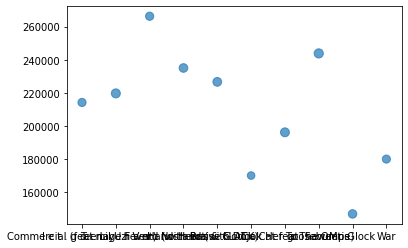

In [27]:
import matplotlib.pyplot as plt
import numpy as np

    
x = reco_df['name']
y = reco_df['duration_ms']
s = reco_df['popularity']
    
plt.scatter(x, y, s, alpha=0.7) # c=reco_df['explicit']
# show the graph
plt.show()

In [28]:
reco_df['duration_min'] = round(reco_df['duration_ms'] / 1000, 0)

/var/folders/1t/fh0rc8r93qgfy7wd8_9_ww8c0000gn/T/ipykernel_29332/1959306096.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reco_df['duration_min'] = round(reco_df['duration_ms'] / 1000, 0)


In [29]:
reco_df["popularity_range"] = reco_df["popularity"] - (reco_df['popularity'].min() - 1)

/var/folders/1t/fh0rc8r93qgfy7wd8_9_ww8c0000gn/T/ipykernel_29332/3481783179.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reco_df["popularity_range"] = reco_df["popularity"] - (reco_df['popularity'].min() - 1)


In [30]:
reco_df

,name,explicit,duration_ms,popularity,duration_min,popularity_range
0,Commercial (feat. Lil Uzi Vert),True,214214,67,214.0,10
1,Teenage Fever,True,219692,82,220.0,25
2,l e t . g o . m y . h a n d (with Bas & 6LACK),True,266291,68,266.0,11
3,No Heart,True,235040,75,235.0,18
4,Praise God,False,226652,77,227.0,20
5,Handstand (with Doja Cat feat. Saweetie),True,170057,58,170.0,1
6,Took Her To The O,True,196179,80,196.0,23
7,goosebumps,True,243836,85,244.0,28
8,Mr. Glock,True,146880,73,147.0,16
9,War,True,180000,66,180.0,9


In [31]:
# Try:
#reco_df["popularity"] - (reco_df['popularity'].min() - 1)

In [32]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


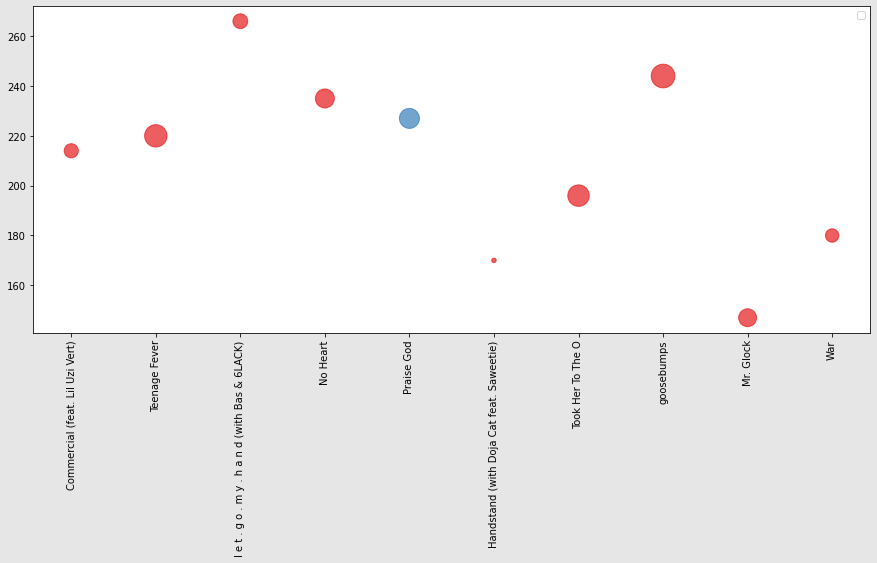

In [33]:
plt.figure(figsize=(15, 6), facecolor=(.9, .9, .9))    

x = reco_df['name']
y = reco_df['duration_min']
s = reco_df['popularity_range']*20
    
color_labels = reco_df['explicit'].unique()
rgb_values = sns.color_palette("Set1", 8)
color_map = dict(zip(color_labels, rgb_values))

plt.scatter(x, y, s, alpha=0.7, c=reco_df['explicit'].map(color_map))
plt.xticks(rotation=90)
plt.legend()
# show the graph
plt.show()